<a href="https://colab.research.google.com/github/brenoslivio/SME0828_DataScience/blob/master/Projects/3%20-%20Classifica%C3%A7%C3%A3o/Projeto3_Classificacao_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SME0828 - Introdução à Ciência de Dados
# Projeto 3: Classificação 

### Alunos

Aline Fernanda da Conceição, Nº USP: 9437275

Breno Lívio Silva de Almeida, Nº USP: 10276675

Matheus Victal Cerqueira, Nº USP: 10276661

***Universidade de São Paulo, São Carlos, Brasil.***

## Exercícios sugeridos para a atividade avaliativa 3

Os seguintes exercícios foram sugeridos para entrega em 03 de novembro de 2020 para a disciplina SME0828 - Ciência de Dados oferecida pelo Instituto de Ciências Matemáticas e de Computação (ICMC) da Universidade de São Paulo (USP), a qual foi ministrada pelo professor Francisco Aparecido Rodrigues. Vamos trabalhar com o conjunto de dados [*Star dataset to predict star types*](https://www.kaggle.com/deepu1109/star-dataset). O dataset tem várias informações sobre características de estrelas como temperatura absoluta, luminosidade relativa, tipos de estrelas, entre outros. Vamos classificar os dados considerando vários classificadores conhecidos.



---



## Sumário

1. Desenvolvimento

  1.1 [Exercício 1](#ex1)

  1.2 [Exercício 2](#ex2)

  1.3 [Exercício 3](#ex3)

  1.4 [Exercício 4](#ex4)

  1.5 [Exercício 5](#ex5)

  1.6 [Exercício 6](#ex6)



---



## Desenvolvimento

### <a name="ex3"></a> 3 - Considere o código abaixo para gerar dados artificialmente.

```
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap=’viridis’, s=50, alpha=0.7)
plt.show(True)
```
### Compare os resultados para os métodos Naive Bayes, Classificador Bayesiano paramétrico e o classificador Bayesiano não-paramétrico, variando o ruído (noise).

Primeiramente, importemos as bibliotecas necessárias para a geração dos dados de interesse e para a sua posterior análise:

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score

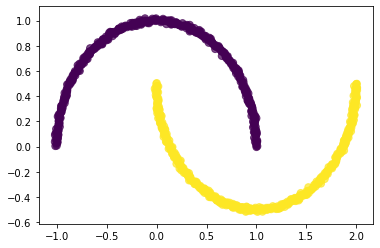

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.01)
X = data[0] #conjunto de dados a serem classificados 
y = data[1] #classes representados por 0 ou 1 (vetro comclassificação ddos dados de X)
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", s=50, alpha=0.7)
plt.show(True)

### Classificador Bayesiano Paramétrico

In [4]:
import warnings
warnings.filterwarnings("ignore")

random.seed(19)

# As classes para a classificação são 0 ou 1, ou seja, os dados de X podem ser calssificados como 0 ou 1 
classes = np.array([0,1])

# Normalização dos dados 
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Divisão do conjunto de dados em conjunto de treinamento e conjunto de teste
p = 0.9 # fração de elementos no conjunto de treino 
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 19)

Agora que definimos as classes, normalizamos o conjunto de dados X e o dividimos em conjunto de teste de conjunto de treino, podemos realizar a classificação propriamente dita:

In [5]:
# Declaração para a matriz que irá armazenar as probabilidades para cada classe

P = pd.DataFrame(data=np.zeros((x_train.shape[0], len(classes))), columns = classes) 

# (Repare que tal matriz apresenta o mesmo número de linhas que x_train e o número de classes como número de 
# colunas, assim poderá armazenar a probabilidade de cada ponto observado pertencer a classe 0 ou 1)

Pc = np.zeros(len(classes)) # Armazenamento da fração de elementos em cada classe (no caso, é um vetor 1x2)


for i in np.arange(0, len(classes)): # Iteração no número de classes
    elem = tuple(np.where(y_train == classes[i])) # Obtenção de tupla correspondente à freq de elem da classe i
    Pc[i] = len(elem)/len(y_train) # Probabilidade de pertencer a classe i (no caso, 0 ou 1)
    Z = x_train[elem,:][0] # Elementos presentes no conjunto de treinamento
    m = np.mean(Z, axis = 0) # Vetor de médias
    cv = np.cov(np.transpose(Z)) # Matriz de variâncias e covariâncias
    for j in np.arange(0,x_test.shape[0]): # Iteração para as observações no conjunto de teste
        x = x_test[j,:]
        # Obtenção da probabilidade de pertencer a cada classe (conjunto teste)
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True) # Modelagem em uma distribuição
        # normal multivariada (Classificador Bayesiano Paramétrico)
        P[classes[i]][j] = pj*Pc[i] # posteriori = verossimilhança x priori (Teorema de Bayes)

y_pred = [] # Declaração do vetor que irá armazenar as classes preditas 
for i in np.arange(0, x_test.shape[0]): # Iteração em len(número de colunas de x_test)
    c = np.argmax(np.array(P.iloc[[i]])) # Identificador (encontra a probabilidade a posteriori com maior valor)
    y_pred.append(classes[c]) # Classificador (classifica os dados de x_test)

# Obtenção da acurácia
score = accuracy_score(y_pred, y_test) #Obtém a acurácia do classificador 
print('Acurácia:', score)

Acurácia: 0.87


### Classificador Bayesiano Não paramétrico

In [6]:
from sklearn.neighbors import KernelDensity

h = 2
for i in np.arange(0, len(classes)): # Iteração no número de classes
    elem = tuple(np.where(y_train == classes[i])) # Obtenção de tupla correspondente à freq de elem da classe i
    Pc[i] = len(elem)/len(y_train) # Probabilidade de pertencer a classe i (no caso, 0 ou 1)
    Z = x_train[elem,:][0] # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z) # obtenção da dsitribuição multivariada dos 
    for j in np.arange(0,x_test.shape[0]): # Iteração para as observações no conjunto de teste
        x = x_test[j,:]
        x = x.reshape((1,len(x)))
        # Obtenção da probabilidade de pertencer a cada classe (conjunto teste)
        pj = np.exp(kde.score_samples(x)) # Atribuição de probabilidades baseado na distribuição kde
        P[classes[i]][j] = pj*Pc[i] # posteriori = verossimilhança x priori (Teorema de Bayes)

y_pred = [] # Declaração do vetor que irá armazenar as classes preditas 
for i in np.arange(0, x_test.shape[0]): # Iteração em len(número de colunas de x_test)
    c = np.argmax(np.array(P.iloc[[i]])) # Identificador (encontra a probabilidade a posteriori com maior valor)
    y_pred.append(classes[c]) # Classificador (classifica os dados de x_test)

# Obtenção da acurácia
score = accuracy_score(y_pred, y_test) #Obtém a acurácia do classificador 
print('Acurácia:', score)

Acurácia: 0.85


### Classificador Naive-Bayes 

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.88


Para comparar os métodos de forma mais eficiente e simplificada, iremos utilizar dos procedimentos feitos acima para a criação de funções que simplifiquem a obtenção da acurácia para cada um dos métodos.

In [10]:
def geracao_dados(n, ruido):
    plt.figure(figsize=(6,4))
    data  = datasets.make_moons(n_samples=n, noise=ruido)
    X = data[0] #conjunto de dados a serem classificados 
    y = data[1] #classes representados por 0 ou 1 (vetor com classificação dos dados de X)
    plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", s=50, alpha=0.7)
    plt.show(True)
    
    return X,y

In [11]:
def preparacao_dados(treino, semente, X, y):
    import warnings
    warnings.filterwarnings("ignore")

    random.seed(semente)

    # As classes para a classificação são 0 ou 1, ou seja, os dados de X podem ser calssificados como 0 ou 1 
    classes = np.array([0,1])

    # Normalização dos dados 
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    # Divisão do conjunto de dados em conjunto de treinamento e conjunto de teste
    p = treino # fração de elementos no conjunto de treino 
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 19)
    return x_train, x_test, y_train, y_test

In [12]:
def bayes_parametrico(x_train, x_test, y_train, y_test):
    # Declaração para a matriz que irá armazenar as probabilidades para cada classe

    P = pd.DataFrame(data=np.zeros((x_train.shape[0], len(classes))), columns = classes) 

    # (Repare que tal matriz apresenta o mesmo número de linhas que x_train e o número de classes como número de 
    # colunas, assim poderá armazenar a probabilidade de cada ponto observado pertencer a classe 0 ou 1)

    Pc = np.zeros(len(classes)) # Armazenamento da fração de elementos em cada classe (no caso, é um vetor 1x2)


    for i in np.arange(0, len(classes)): # Iteração no número de classes
        elem = tuple(np.where(y_train == classes[i])) # Obtenção de tupla correspondente à freq de elem da classe i
        Pc[i] = len(elem)/len(y_train) # Probabilidade de pertencer a classe i (no caso, 0 ou 1)
        Z = x_train[elem,:][0] # Elementos presentes no conjunto de treinamento
        m = np.mean(Z, axis = 0) # Vetor de médias
        cv = np.cov(np.transpose(Z)) # Matriz de variâncias e covariâncias
        for j in np.arange(0,x_test.shape[0]): # Iteração para as observações no conjunto de teste
            x = x_test[j,:]
            # Obtenção da probabilidade de pertencer a cada classe (conjunto teste)
            pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True) # Modelagem em uma distribuição
            # normal multivariada (Classificador Bayesiano Paramétrico)
            P[classes[i]][j] = pj*Pc[i] # posteriori = verossimilhança x priori (Teorema de Bayes)

    y_pred = [] # Declaração do vetor que irá armazenar as classes preditas 
    for i in np.arange(0, x_test.shape[0]): # Iteração em len(número de colunas de x_test)
        c = np.argmax(np.array(P.iloc[[i]])) # Identificador (encontra a probabilidade a posteriori com maior valor)
        y_pred.append(classes[c]) # Classificador (classifica os dados de x_test)

    # Obtenção da acurácia
    score = accuracy_score(y_pred, y_test) #Obtém a acurácia do classificador 
    print('Acurácia:', score1)
    
    return score1

In [13]:
def bayes_n_parametrico(x_train, x_test, y_train, y_test):
    from sklearn.neighbors import KernelDensity
    
    # Declaração para a matriz que irá armazenar as probabilidades para cada classe

    P = pd.DataFrame(data=np.zeros((x_train.shape[0], len(classes))), columns = classes) 

    # (Repare que tal matriz apresenta o mesmo número de linhas que x_train e o número de classes como número de 
    # colunas, assim poderá armazenar a probabilidade de cada ponto observado pertencer a classe 0 ou 1)

    Pc = np.zeros(len(classes)) # Armazenamento da fração de elementos em cada classe (no caso, é um vetor 1x2)
    

    h = 2
    for i in np.arange(0, len(classes)): # Iteração no número de classes
        elem = tuple(np.where(y_train == classes[i])) # Obtenção de tupla correspondente à freq de elem da classe i
        Pc[i] = len(elem)/len(y_train) # Probabilidade de pertencer a classe i (no caso, 0 ou 1)
        Z = x_train[elem,:][0] # Elementos no conjunto de treinamento
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z) # obtenção da dsitribuição multivariada dos 
        for j in np.arange(0,x_test.shape[0]): # Iteração para as observações no conjunto de teste
            x = x_test[j,:]
            x = x.reshape((1,len(x)))
            # Obtenção da probabilidade de pertencer a cada classe (conjunto teste)
            pj = np.exp(kde.score_samples(x)) # Atribuição de probabilidades baseado na distribuição kde
            P[classes[i]][j] = pj*Pc[i] # posteriori = verossimilhança x priori (Teorema de Bayes)

    y_pred = [] # Declaração do vetor que irá armazenar as classes preditas 
    for i in np.arange(0, x_test.shape[0]): # Iteração em len(número de colunas de x_test)
        c = np.argmax(np.array(P.iloc[[i]])) # Identificador (encontra a probabilidade a posteriori com maior valor)
        y_pred.append(classes[c]) # Classificador (classifica os dados de x_test)

    # Obtenção da acurácia
    score = accuracy_score(y_pred, y_test) #Obtém a acurácia do classificador 
    print('Acurácia:', score)
    
    return score

In [14]:
def naive_bayes(x_train, x_test, y_train, y_test):
    from sklearn.naive_bayes import GaussianNB
    from sklearn import metrics

    model = GaussianNB()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    print('Accuracy:', score)
    
    return score

In [16]:
def gerador_preparador(n, semente, ruido, treino):
    
    X,y = geracao_dados(n,ruido)
    x_train, x_test, y_train, y_test = preparacao_dados(treino, semente, X,y)
    return x_train, x_test, y_train, y_test

In [26]:
def comparativo_bayes(x_train, x_test, y_train, y_test):
    
    score1 = bayes_parametrico(x_train, x_test, y_train, y_test)
    score2 = bayes_n_parametrico(x_train, x_test, y_train, y_test)
    score3 = naive_bayes(x_train, x_test, y_train, y_test)
    
    return score1, score2, score3

Tendo-se as funções acima em mãos, façamos uma comparação mais organizada e assertiva:

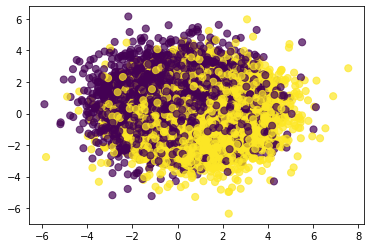

In [44]:
n = 10000
ruido = 1.5
semente = 11
treino = 0.8

x_train, x_test, y_train, y_test = gerador_preparador(n, semente, ruido, treino)

In [45]:
score1,score2,score3 = comparativo_bayes(x_train, x_test, y_train, y_test)

Acurácia: 0.6415
Acurácia: 0.642
Accuracy: 0.6415


### <a name="ex4"></a> 4 - Considerando os dados artificiais do exercício anterior, mostre as regiões de separação para os métodos Naive Bayes, k-vizinhos e regressão logística.

In [47]:
from mlxtend.plotting import plot_decision_regions

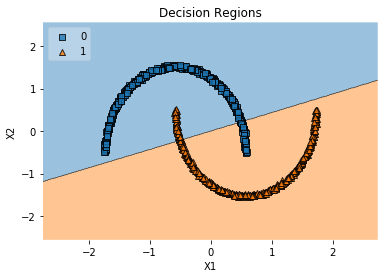

In [48]:


# Training a classifier
model = GaussianNB()
model.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()

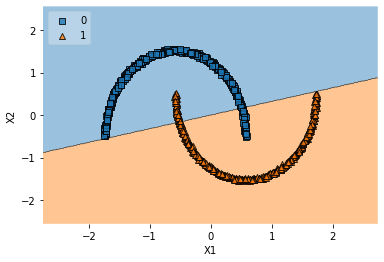

In [49]:
from sklearn.linear_model import LogisticRegression

# Training a classifier
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.savefig('logistic-region.eps')
plt.show()

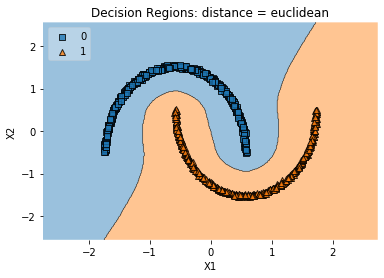

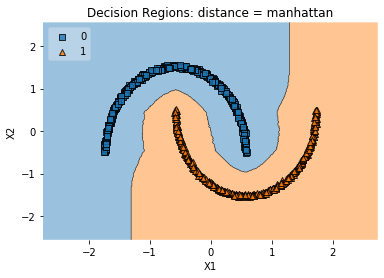

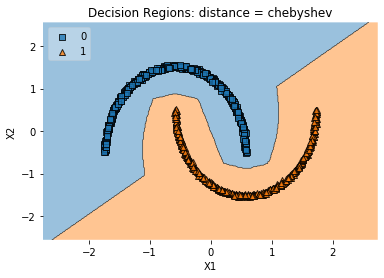

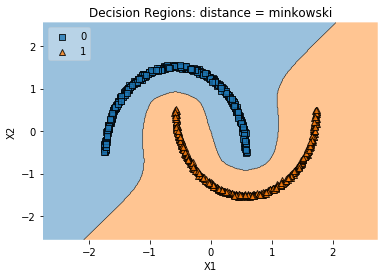

In [50]:
from sklearn.neighbors import KNeighborsClassifier

vm = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k = 21
for d in vm:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = d, p=3)
    model.fit(X, y)
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: distance = '+ d)
    #plt.savefig('knn_' + str(d)+'.eps')
    plt.show()